# Hutchinson's Trick : The Stochastic Trace Estimator
Hutchinson's estimator is a simple way to obtain a stochastic estimate of the **trace** of a matrix. This is a simple trick that uses randomization to transform the algebraic problem of computing the trace into the statistical problem of computing an expectation of a quadratic function.
<img src="http://blog.shakirm.com/wp-content/uploads/2015/09/hutchinson.png" alt='image does not exist' width="600" height="600" />

image source: [Shakir's Machine Learning Blog on Hutchinson's Trick](http://blog.shakirm.com/2015/09/machine-learning-trick-of-the-day-3-hutchinsons-trick/)

## Lemma 1: 
Consider a multivariate random variable $z$ with mean $m$ and variance $\Sigma$. Using the property of expectations of quadratic forms, the expectation $\mathbb{E}(zz^T)=\Sigma+mm^T$.
## Proof of Lemma 1:
It suffices to recall the following two results:
1. $\mathbb{E}[x_1 x_2] = \mathbb{E}[x_1] \mathbb{E}[x_2]$ if $x_1$ and $x_2$ are independent random variables
2. $\mathrm{Var}(x) = \mathbb{E}[(x - \mu)^2] = \mathbb{E}[x^2] - (\mathbb{E}[x])^2 \rightarrow 
\mathbb{E}[x^2] = \mathrm{Var}(x) + (\mathbb{E}[x])^2$

The consequence of Lemma 1 is: for zero-mean, unit-variance random variables, $\mathbb{E}(zz^T)=I$. The following code visualizes this result.

## Visualization

In [1]:
import numpy as np
from numpy.random import random
from numpy.random import randint
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)
n = 10000
l = 20

z = np.random.randn(n,l,1)

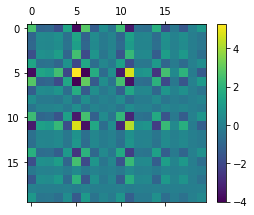

In [3]:
z[0]*z[0].T
plt.matshow(z[0]*z[0].T)
plt.colorbar(shrink = 0.8)
plt.show()

In [4]:
ele_sum = np.zeros((l,l)) # do not use numpy.empty() as input for np.add(). This may cause numerical instability.
for i in range(0,n):
    ele_sum = np.add(ele_sum, z[i]*z[i].T)

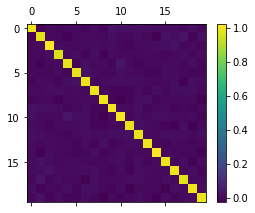

In [5]:
plt.matshow(np.divide(ele_sum, n))
plt.colorbar(shrink = 0.8)
plt.show()

On the other hand,
\begin{equation}
Tr(\mathbf{A}) =Tr(\mathbf{A I}) =Tr(\mathbf{A\mathbb{E}[\mathbf{z} \mathbf{z}^\top]}) = \mathbb{E}[Tr( \mathbf{A} \mathbf{z} \mathbf{z}^\top)]
\end{equation}
apply **cyclic property of the trace**, the above equation becomes:
\begin{equation}
\mathbb{E}[Tr(\mathbf{z}^\top\mathbf{A}\mathbf{z})]
\end{equation}
But we notice $\mathbf{z}^\top\mathbf{A}\mathbf{z}$ is a scaler quantity which indeed is
\begin{equation}
\mathbb{E}[ \mathbf{z}^\top\mathbf{A}\mathbf{z}]
\end{equation}
That is,
\begin{equation}
Tr(\mathbf{A}) = \mathbb{E}[ \mathbf{z}^\top\mathbf{A}\mathbf{z}]
\end{equation}

See related results on [Quadratic Form](<https://en.wikipedia.org/wiki/Quadratic_form_(statistics)>)

## Experiment

In [6]:
A = randint(0, 100, size = (l, l))

use the definite trace function $t := Tr(\mathbf{A})$

In [7]:
t = np.trace(A)

In [8]:
t

1006

using the randomized trace estimation $t_*$
\begin{equation}
t_* := \mathbb{E}[ \mathbf{z}^\top\mathbf{A}\mathbf{z}]
\end{equation}

In [9]:
est_trace = np.empty(n)
for i in range(0,n):
    est_trace[i] = z[i].T.dot(A).dot(z[i])

t_star = np.mean(est_trace)
t_star

1016.6320822905345

Define the estimation error as
\begin{equation}
err = \frac{\lvert t - t_* \rvert}{\lvert t \rvert}
\end{equation}

In [10]:
err = np.absolute((t - t_star)/t)

In [11]:
print('estimation err = {:.2f}%\n'.format(100. * err))

estimation err = 1.06%

